<a href="https://colab.research.google.com/github/amandasmagalhaes/imnl-cedeplar/blob/main/Maximum%20likelihood%20estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# rmagic: Magic command interface for interactive work with R via rpy2
#%load_ext rpy2.ipython
%reload_ext rpy2.ipython

import matplotlib.pyplot as plt
from IPython.display import Image

___

# **Estimativa de máxima verossimilhança do zero**

### **Estimativas de máxima verossimilhança de uma distribuição**

Estimativa de máxima verossimilhança (MLE) é um método para estimar os parâmetros de uma população aleatória dada uma amostra.  

Antes de podermos examinar o MLE, primeiro precisamos **entender a diferença entre probabilidade e densidade de probabilidade para variáveis ​​contínuas**.  
  
A **densidade de probabilidade** pode ser vista como uma medida de probabilidade relativa, ou seja, **valores localizados em áreas com maior probabilidade obterão maior densidade de probabilidade**.  
Mais precisamente, a probabilidade é a integral da densidade de probabilidade em um intervalo.  
Por exemplo, **a curva clássica "em forma de sino" associada à distribuição normal é uma medida de densidade de probabilidade, enquanto a probabilidade corresponde à área sob a curva para um determinado intervalo de valores**:

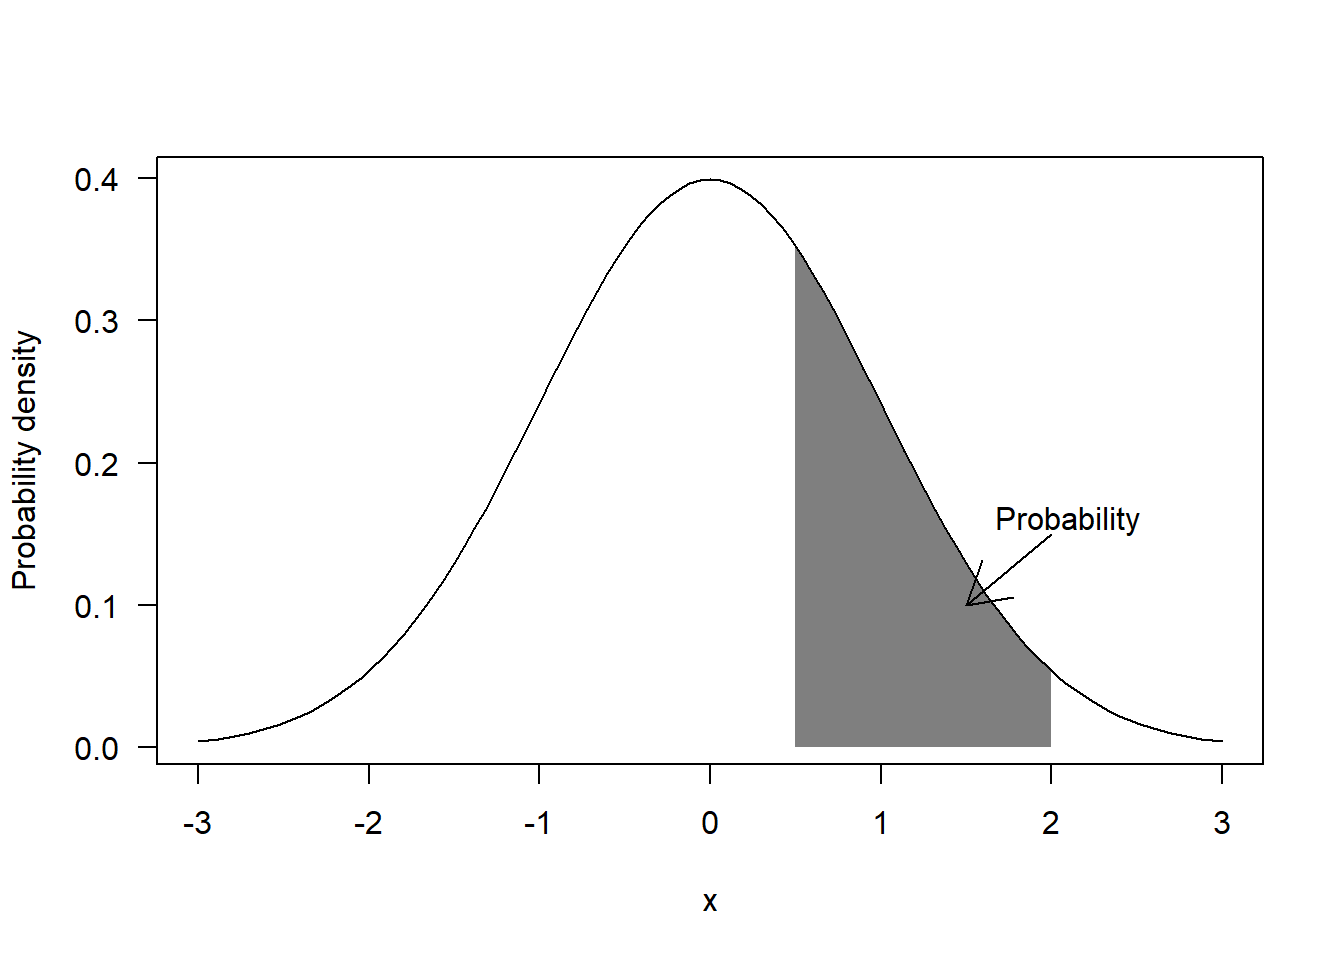

In [ ]:
%matplotlib inline
Image('https://alemorales.info/post/04_mle_nonlinear_files/figure-html/unnamed-chunk-2-1.png', retina = True)

Se atribuirmos um modelo estatístico à população aleatória, qualquer valor particular amostrado da população terá uma densidade de probabilidade de acordo com o modelo.  
Se então assumirmos que todos os valores em nossa amostra são estatisticamente independentes (ou seja, a probabilidade de amostrar um valor particular não depende do resto dos valores já amostrados), então a probabilidade de observar toda a amostra é definido como o produto das densidades de probabilidade dos valores individuais.  

A ideia por trás do MLE é **encontrar os valores dos parâmetros no modelo estatístico que maximizam o valor**. Em outras palavras, **ele calcula a população aleatória que tem maior probabilidade de gerar os dados observados, embora seja restrita a um determinado tipo de distribuição**.  

Uma complicação do método MLE é que, como as densidades de probabilidade são frequentemente menores do que 1, o valor pode tornar-se muito pequeno à medida que o tamanho da amostra aumenta. Por exemplo, a probabilidade de 100 valores amostrados de uma distribuição normal padrão é muito pequena:

In [ ]:
%%R

set.seed(2019)
sample = rnorm(100)
prod(dnorm(sample))

[1] 2.23626e-58


**Quando a variância da distribuição é pequena, também é possível ter densidades de probabilidade maiores que um.**  
**Nesse caso, a função de verossimilhança aumentará para valores muito grandes.** Por exemplo, para uma distribuição normal com desvio padrão de 0,1, obtemos:

In [ ]:
%%R

sample_large = rnorm(100, sd = 0.1)
prod(dnorm(sample_large, sd = 0.1))

[1] 2.741535e+38


A razão pela qual isso é um problema é que os computadores têm uma capacidade limitada de armazenar os dígitos de um número, portanto, eles não podem armazenar números muito grandes ou muito pequenos.  
Se você repetir o código acima, mas usando tamanhos de amostra de, digamos, 1000, você obterá *0* ou *Inf* vez dos valores reais, porque seu computador simplesmente desistirá.

In [ ]:
%%R

sample_large = rnorm(1000, sd = 0.1)
prod(dnorm(sample_large, sd = 0.1))

[1] Inf


Embora seja possível aumentar a quantidade de dígitos a serem armazenados por número, isso não resolve realmente o problema, pois ele eventualmente retornará com amostras maiores.  
Além disso, na maioria dos casos, precisaremos usar algoritmos de otimização numérica, o que tornará o problema ainda pior. Portanto, não podemos trabalhar diretamente com a função de verossimilhança.  

**Um truque é usar o logaritmo natural da função de verossimilhança.**  
Uma boa propriedade é que o logaritmo de um produto de valores é a soma dos logaritmos desses valores.  

Além disso, os valores de log-verossimilhança sempre estarão mais próximos de 1 e o máximo ocorre para os mesmos valores de parâmetro que para a verossimilhança. Por exemplo, a probabilidade da primeira amostra gerada acima é:

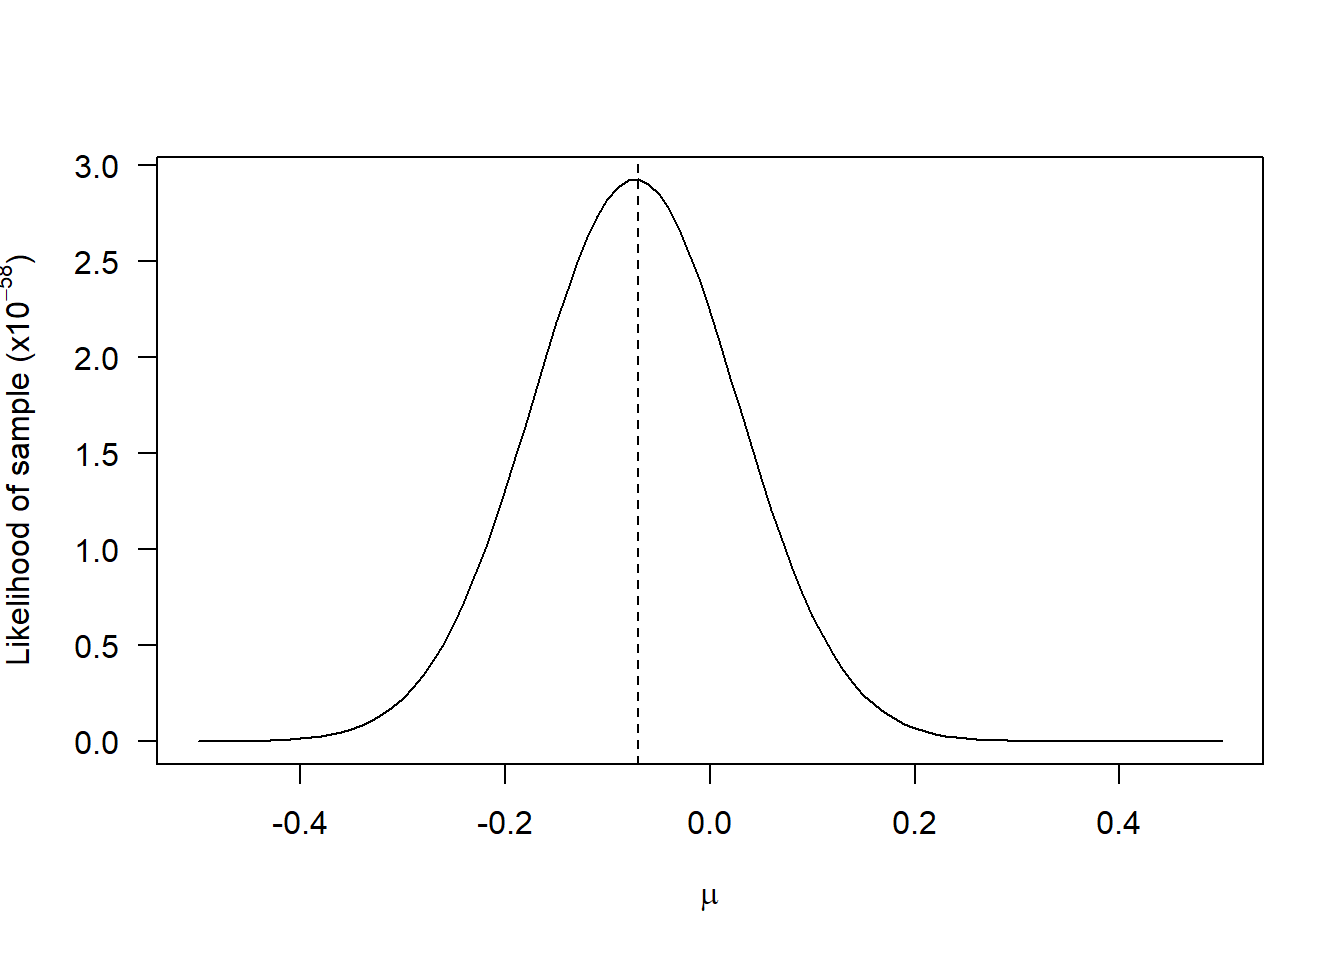

In [ ]:
%matplotlib inline
Image('https://alemorales.info/post/04_mle_nonlinear_files/figure-html/unnamed-chunk-5-1.png', retina = True)

enquanto para a probabilidade logarítmica torna-se:

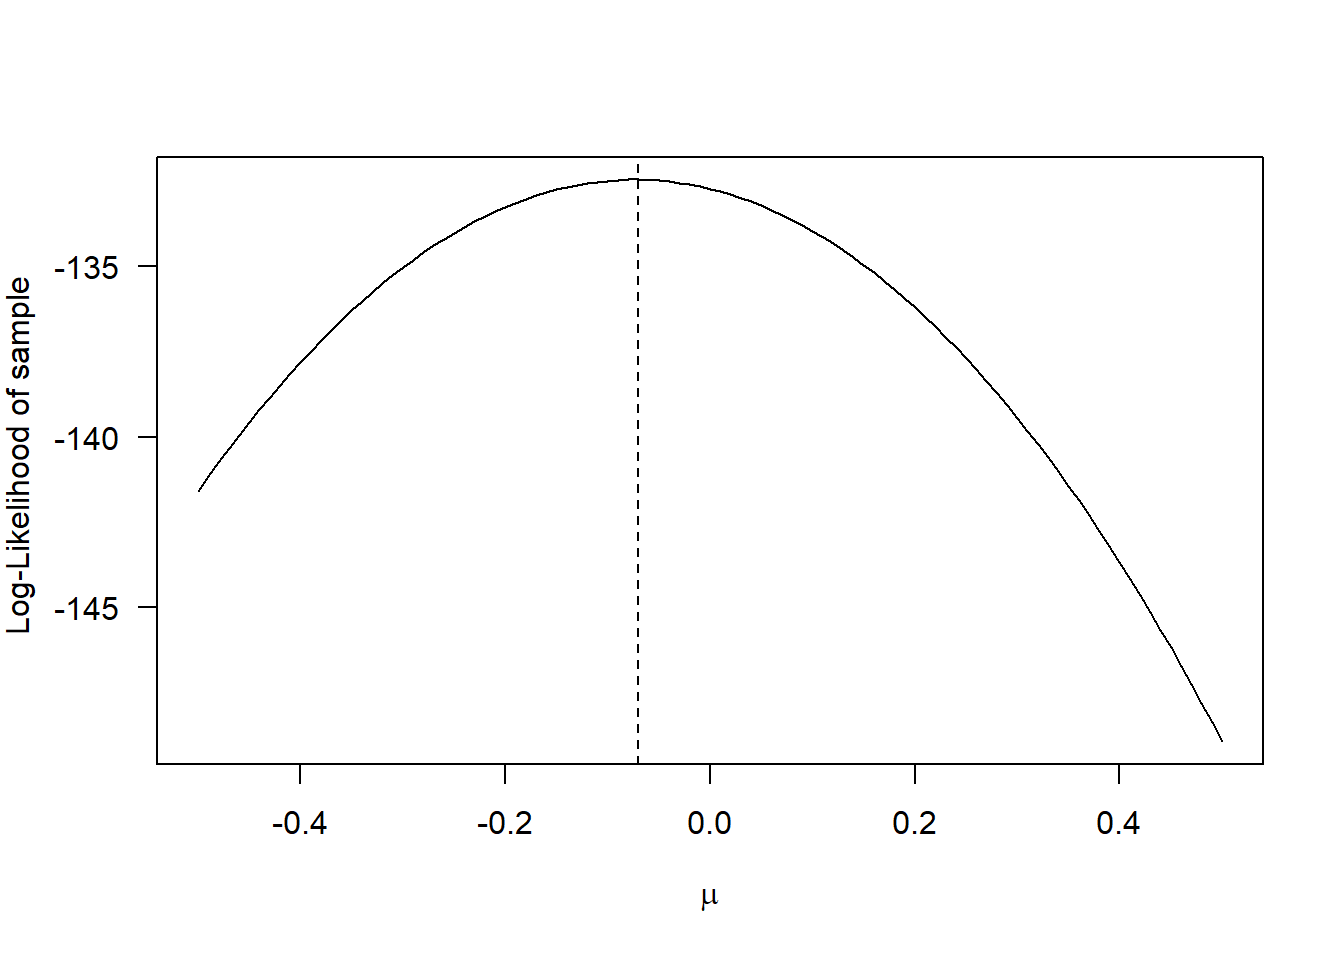

In [ ]:
%matplotlib inline
Image('https://alemorales.info/post/04_mle_nonlinear_files/figure-html/unnamed-chunk-6-1.png', retina = True)

**Embora as formas das curvas sejam diferentes, o máximo ocorre para o mesmo valor de µ.**  
Observe que não há nada de especial no logaritmo natural: poderíamos ter tomado o logaritmo com base 10 ou qualquer outra base.  
Mas é comum usar o logaritmo natural, pois algumas funções importantes de densidade de probabilidade são funções exponenciais (por exemplo, a distribuição Normal), portanto, tomar o logaritmo natural torna as análises matemáticas mais fáceis.  

**Você deve ter notado que o valor ideal de µ não era exatamente 0, embora os dados fossem gerados a partir de uma distribuição normal com µ= 0. Esta é a razão pela qual é chamado de estimador de máxima verossimilhança.**  
A fonte desse desvio é que a amostra não é uma representação perfeita da população, justamente pela aleatoriedade do procedimento de amostragem.  
**Uma boa propriedade do MLE é que, geralmente, o estimador convergirá assintoticamente para o valor verdadeiro na população (ou seja, conforme o tamanho da amostra aumenta, a diferença entre a estimativa e o valor verdadeiro diminui).**  

O último detalhe técnico que você precisa saber é que, exceto para modelos triviais, o método MLE não pode ser aplicado analiticamente.  
Uma opção é tentar uma sequência de valores e procurar aquele que produz a probabilidade de log máxima (isso é conhecido como abordagem de grade).  
No entanto, se houver muitos parâmetros a serem estimados, essa abordagem será muito ineficiente. Por exemplo, se tentarmos apenas 20 valores por parâmetro e tivermos 5 parâmetros, precisaremos testar 3,2 milhões de combinações.  


Em vez disso, o método MLE é geralmente aplicado usando algoritmos conhecidos como otimizadores não lineares.  
Você pode alimentar esses algoritmos com qualquer função que tome números como entradas e retorne um número como saída e eles calcularão os valores de entrada que minimizam ou maximizam a saída.  
Realmente não importa o quão complexa ou simples seja a função, pois eles a tratarão como uma caixa preta.  
Por convenção, os otimizadores não lineares minimizarão a função e, em alguns casos, não temos a opção de dizer a eles para maximizá-la. Portanto, a convenção é minimizar a probabilidade de log negativo (NLL).  

Vamos estimar os valores de µ (média) e σ (desvio padrão) da primeira amostra que geramos acima.  
Primeiro, precisamos criar uma função para calcular o NLL.  
É uma boa prática seguir alguns modelos para gerar essas funções.  
Uma função NLL deve receber duas entradas: (i) **um vetor de valores de parâmetros que o algoritmo de otimização deseja testar** (pars) e (ii) **os data para o qual o NLL é calculado**. Para o problema de estimar µ e σ, a função se parece com isto:

In [ ]:
%%R

NLL = function(pars, data) {
  # Extract parameters from the vector
  mu = pars[1]
  sigma = pars[2]
  # Calculate Negative Log-LIkelihood
  -sum(dnorm(x = data, mean = mu, sd = sigma, log = TRUE))
}

A função *dnorm* retorna a densidade de probabilidade dos dados assumindo uma distribuição normal com a média e o desvio padrão fornecidos (mean e sd).  
O argumento log = TRUE diz ao R para calcular o logaritmo da densidade de probabilidade.  
Em seguida, precisamos apenas somar todos esses valores (o que produz o log da verossimilhança) e trocar o sinal para obter o NLL.

Agora podemos minimizar o NLL usando a função *optim*. Essa função precisa dos valores iniciais para cada parâmetro (par), a função que calcula o NLL (fn) e os argumentos que serão passados ​​para a função objetivo (em nosso exemplo, será data).  
Também podemos ajustar algumas configurações com o argumento *control*.  
Eu recomendo definir a configuração *parscale* para os valores iniciais absolutos (assumindo que nenhum dos valores iniciais seja 0).  
Essa configuração determina a escala dos valores que você espera para cada parâmetro e ajuda o algoritmo a encontrar a solução certa.  
A optimfunção retornará um objeto que contém todas as informações relevantes e, para extrair os valores ideais para os parâmetros, você precisa acessar o campo *par*:

In [ ]:
%%R

mle = optim(par = c(mu = 0.2, sigma = 1.5), fn = NLL, data = sample,
            control = list(parscale = c(mu = 0.2, sigma = 1.5)))
mle$par

         mu       sigma 
-0.07332745  0.90086176 


Acontece que este problema tem uma solução analítica, de modo que os valores de MLE para µ e σ  da distribuição normal também pode ser calculado diretamente como:

In [ ]:
%%R

c(mu = mean(sample), sigma = sd(sample))

        mu      sigma 
-0.0733340  0.9054535 


Sempre há um pouco de erro numérico na hora de usar o *optim*, mas encontrou valores muito próximos aos analíticos.  
Leve em consideração que muitos problemas de MLE não podem ser resolvidos analiticamente, portanto, em geral, você precisará usar a otimização numérica.

### **MLE aplicado a um modelo científico**  

Neste caso, temos um modelo científico que descreve um fenômeno particular e queremos estimar os parâmetros desse modelo a partir dos dados usando o método MLE. Como exemplo, usaremos uma curva de crescimento típica em ecologia vegetal.

Vamos imaginar que fizemos uma série de visitas a um campo de cultivo durante sua estação de cultivo. Em cada visita, registramos os dias desde que a safra foi semeada e a fração da área do solo que é coberta pelas plantas.  
Isso é conhecido como cobertura do solo (G) e pode variar de 0 (sem plantas presentes) a 1 (campo totalmente coberto por plantas). Um exemplo de tais dados seria o seguinte:

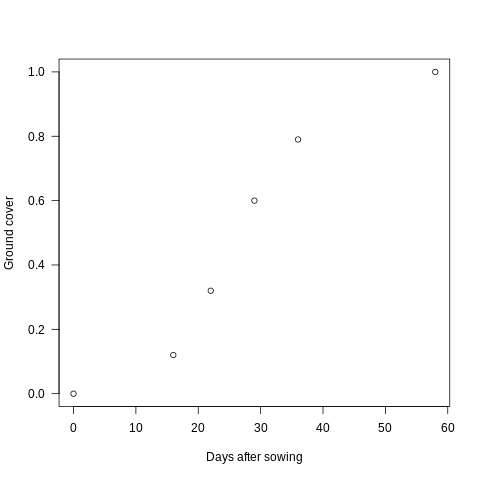

In [ ]:
%%R

data = data.frame(t = c(0, 16, 22, 29, 36, 58),
                  G = c(0, 0.12, 0.32, 0.6, 0.79, 1))
plot(data, las = 1, xlab = "Days after sowing", ylab = "Ground cover")

Nossa primeira intuição seria usar a função clássica de crescimento logístico para descrever esses dados. No entanto, esta função não garante que G é 0 em t = 0. Portanto, vamos usar uma versão modificada da função logística que garante G = 0 no t = 0.

In [ ]:
%%R

G = function(pars, t) {
  # Extract parameters of the model
  Gmax = pars[1]
  k = pars[2]
  th = pars[3]
  # Prediction of the model
  DG = Gmax/(1 - 1/(1 + exp(k*th)))
  Go = DG/(1 + exp(k*th))
  DG/(1 + exp(-k*(t - th))) - Go
}

Observe que, em vez de passar os 3 parâmetros da curva como argumentos separados, eu os empacotei em um vetor chamado *pars*. Isso segue o mesmo modelo da função NLL.

Os algoritmos de otimização não linear sempre requerem alguns valores iniciais para os parâmetros que estão sendo otimizados. Para modelos simples como este, podemos apenas experimentar diferentes valores e representá-los no topo dos dados. Isso é o que eu consegui depois de algumas tentativas:

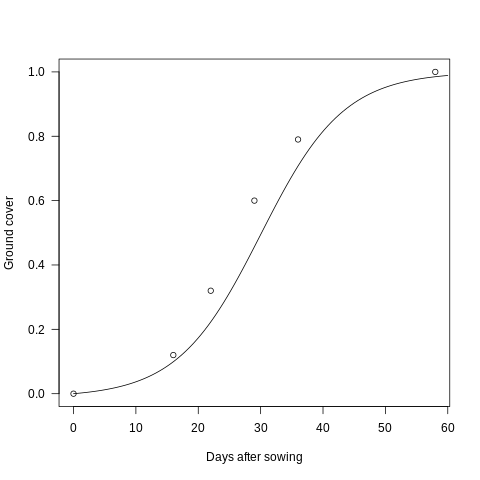

In [ ]:
%%R

plot(data, las = 1, xlab = "Days after sowing", ylab = "Ground cover")
curve(G(c(Gmax = 1, k = 0.15, th = 30), x), 0, 60, add = TRUE)

Se quisermos estimar os valores de acordo com o método MLE, precisamos construir uma função em R que calcule o NLL dado um modelo estatístico e uma escolha de valores de parâmetro.  
Isso significa que precisamos decidir sobre uma distribuição para representar os desvios entre o modelo e os dados.  
A maneira canônica de fazer isso é assumir uma distribuição normal, onde µ é calculado pelo modelo científico de interesse, permitindo σ representam o grau de dispersão dos dados em torno da tendência média.  
Para manter as coisas simples, vou seguir essa abordagem agora.  
A função NLL é semelhante à anterior, mas agora a média está definida para as previsões do modelo:

In [ ]:
%%R

NLL = function(pars, data) {
  # Values predicted by the model
  Gpred = G(pars, data$t)
  # Negative log-likelihood 
  -sum(dnorm(x = data$G, mean = Gpred, sd = pars[4], log = TRUE))
}

Agora podemos calcular os valores ideais usando *optime* os valores iniciais "observados" (é claro, também precisamos ter uma estimativa inicial para σ):

In [ ]:
%%R

par0 = c(Gmax = 1.0, k = 0.15, th = 30, sd = 0.01)
fit = optim(par = par0, fn = NLL, data = data, control = list(parscale = abs(par0)), 
            hessian = TRUE)
fit$par

       Gmax           k          th          sd 
 0.99926603  0.15879585 26.70700004  0.01482376 


Observe que observar os valores iniciais já nos aproximou da solução ótima.  
Claro, para modelos complicados, suas estimativas iniciais não serão tão boas, mas sempre vale a pena brincar com o modelo antes de ir para a otimização.  
Finalmente, podemos comparar as previsões do modelo com os dados:

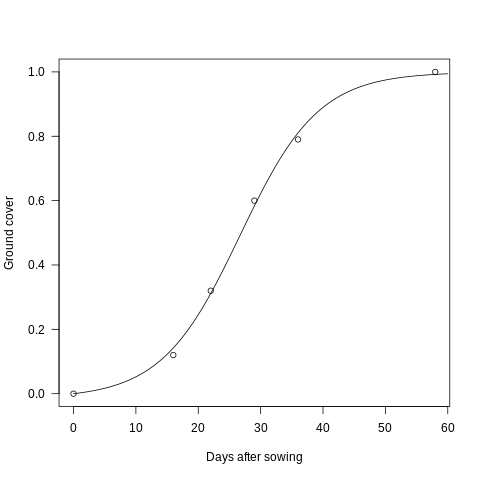

In [ ]:
%%R

plot(data, las = 1, xlab = "Days after sowing", ylab = "Ground cover")
curve(G(fit$par, x), 0, 60, add = TRUE)

### **Considerações finais**

O modelo acima poderia ter sido ajustada utilizando o método de mínimos quadrados (OLS) com a função R *nls*. Na verdade, a menos que algo dê errado na otimização, você deve obter os mesmos resultados do método descrito aqui.  
**A razão é que OLS é equivalente a MLE com uma distribuição normal e desvio padrão constante.** No entanto, acredito que vale a pena aprender MLE porque:

* Você não precisa se restringir à distribuição Normal. Em alguns casos (por exemplo, ao modelar dados de contagem), não faz sentido assumir uma distribuição Normal. Na verdade, no modelo de cobertura do solo, uma vez que os valores de G são restritos a estar entre 0 e 1, teria sido mais correto usar outra distribuição, como a distribuição Beta (no entanto, para esses dados em particular, você obterá resultados muito semelhantes, então decidi manter as coisas simples e familiares).  

* Você não precisa se limitar a modelar apenas a média da distribuição. Por exemplo, se você tem motivos para acreditar que os erros não têm uma variação constante, você também pode modelar o σ parâmetro da distribuição normal. Ou seja, você pode modelar qualquer parâmetro de qualquer distribuição.  

* Se você entender o MLE, será muito mais fácil entender métodos mais avançados, como probabilidade penalizada (também conhecida como regressão regularizada) e abordagens bayesianas, já que também são baseadas no conceito de probabilidade.  

* Você pode combinar o NLL de vários conjuntos de dados dentro da função NLL, enquanto nos mínimos quadrados ordinários, se você quiser combinar dados de diferentes experimentos, você deve corrigir para diferentes escalas ou unidades de medida e para diferenças na magnitude dos erros de seu modelo faz para conjuntos de dados diferentes.  

* Muitos métodos de seleção de modelo (os chamados critérios de informação , como AIC) são baseados em MLE.  

* Usar uma função para calcular NLL permite que você trabalhe com qualquer modelo (contanto que você possa calcular uma densidade de probabilidade) e conjunto de dados, mas não tenho certeza de que isso seja possível ou conveniente com a interface da fórmula nls (por exemplo, combinar vários conjuntos de dados não é fácil ao usar uma interface de fórmula).  

## **Referência**

> [Estimativa de máxima verossimilhança do zero](https://alemorales.info/post/mle-nonlinear/)

___

# **Videoaulas: Estimativa de Máxima Verossimilhança**

### **Introdução**  

A Estimativa de Máxima Verossimilhança (MLE) é um método de estimar os parâmetros de um modelo. Este método de estimativa é um dos mais amplamente utilizados.

**O método de máxima verossimilhança seleciona o conjunto de valores dos parâmetros do modelo que maximiza a função de verossimilhança. Intituitivamente, isso maximiza a 'concordância' do modelo selecionado com os dados observados.**

A estimativa de probabilidade Meximum fornece uma abordagem unificada para a estimativa.


Quais são as principais propriedades do estimador de máxima verossimilhança?
* É assintoticamente imparcial?
* É assintoticamente eficiente? Sob qual(is) condição(ões)?
* É consistente?
* Qual é a distribuição assintótica?

Como aplicar o princípio de máxima verossimilhança ao modelo de regressão linear múltipla, aos modelos Probit / Logit, etc?

### **O princípio da máxima verossimilhança**

In [ ]:
%%R # My_first_likelihood.R

# Sample
#set.seed(2021)
#x <- rpois(10, 2)
x <- c(5, 0, 1, 1, 0, 3, 2, 3, 4, 1)

In [ ]:
%%R

# Sample size
N <- length(x)

In [ ]:
%%R

# Potential values of lambda
theta <- seq(from=0, to=4, by=0.01)

In [ ]:
%%R

# Likelihood function by command
Ln1 <- rep(NA, times = length(theta))
for (i in 1:length(theta)){
  Ln1[i] <- prod(dpois(x, lambda = theta[i]))
}

In [ ]:
%%R

# Pedestrian approach
Ln2 <- exp(-theta*N)*(theta^sum(x))/prod(factorial(x))

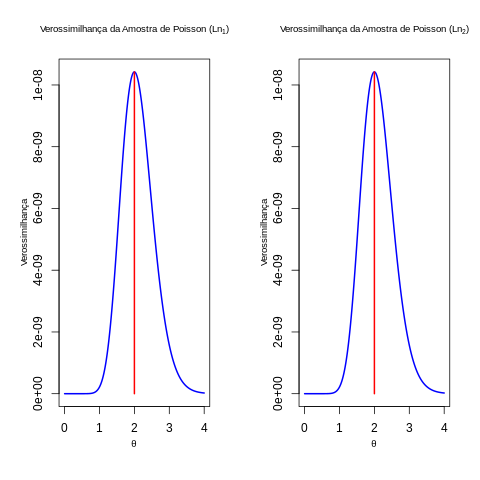

In [ ]:
%%R

# Plotting the likelihood function
par(mfrow=c(1,2),
    mgp=c(2,1,0))

plot(x=theta, y=Ln1, col="white",
     xlab=expression(theta),ylab="Verossimilhança",
     main=substitute(paste("Verossimilhança da Amostra de Poisson (",
                           Ln[1], ")", sep="")),
     cex.main=0.8, cex.lab=0.8)
lines(x=theta, y=Ln1, col="blue", lwd=2)
segments(x0=2,y0=0,x1=2,y1=max(Ln1), col="red", lwd=2)

plot(x=theta, y=Ln2, col="white",
     xlab=expression(theta),ylab="Verossimilhança",
     main=substitute(paste("Verossimilhança da Amostra de Poisson (",
                           Ln[2], ")", sep="")),
     cex.main=0.8, cex.lab=0.8)
lines(x=theta, y=Ln2, col="blue", lwd=2)
segments(x0=2,y0=0,x1=2,y1=max(Ln2), col="red", lwd=2)

Considere maximizar a função de verossimilhança em relação a teta.  
Como a função de log está aumentando monotonicamente, geralmente maximizamos.


**Variáveis contínuas**  
Função densidade probabilidade (pdf) da distribuição marginal de X.  
Não consigo calcular a densidade por ponto.

### **A função de verossimilhança: definições e notações**


Observação: a função log-verossimilhança depende de dois tipos de argumentos:
* Amostra (realização): x1, x2, ..., xN
* Uma estimativa do parâmetro: vetor y  

Função de log-verossimilhança: Ln (y; x1, ..., xn) = prod f (xi; y)  


Observação: Dado este princípio, podemos derivar as funções de verossimilhança (condicional) e log-verossimilhança associadas a uma amostra específica para qualquer tipo de modelo econométrico em que a distribuição condicional da variável dependente seja conhecida.
* Modelos dicotômicos: modelos probit, logit etc.
* Modelos de regressão censurados: Tobit etc.
* Modelos de séries temporais: AR, ARMA, VAR etc.
* Modelos GARCH.
* ...

Em um modelo probit, denota o cdf da distribuição normal padrão.  
Em um modelo logit, denota o cdf da distribuição logística.

**Conceitos chave**
* Função de verossimilhança (de uma amostra)
* Função de log-verossimilhança (de uma amostra)
* Verossimilhança condicional e função de verossimilhança logarítmica
* Probabilidade e probabilidade de log de uma observação

### **MScore, Hessian and Fisher Information**



In [ ]:
%%R # Simulating_Fisher_Information.R

# Sample
set.seed(2021)
s1 <- rnorm(100,0,1)
s2 <- rnorm(100,0,10)

In [ ]:
%%R

# Sample size
N <- length(s1)

In [ ]:
%%R

# Potential values of mu
mu <- seq(from=-5, to=4.99, by=0.01)

In [ ]:
%%R

# Likelihood function by command
Ln <- list()
Ln[[1]] <- rep(NA, times = length(mu))
Ln[[2]] <- rep(NA, times = length(mu))

for (i in 1:length(mu)){
    Ln[[1]][i] <- prod(dnorm(s1, mean = mu[i], sd = 1))
    Ln[[2]][i] <- prod(dnorm(s2, mean = mu[i], sd = 10))
}

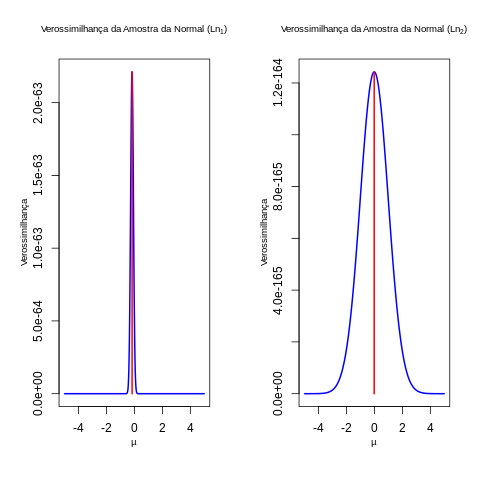

In [ ]:
%%R

# Plotting the likelihood function
par(mfrow=c(1,2),
    mgp=c(2,1,0))
plot(x=mu, y=Ln[[1]], col="white",
     xlab=expression(mu),ylab="Verossimilhança",
     main=substitute(paste("Verossimilhança da Amostra da Normal (",
                           Ln[1], ")", sep="")),
     cex.main=0.8, cex.lab=0.8)
lines(x=mu, y=Ln[[1]], col="blue", lwd=2)
segments(x0=mu[which.max(Ln[[1]])],y0=0,x1=mu[which.max(Ln[[1]])],y1=max(Ln[[1]]), col="red", lwd=2)

plot(x=mu, y=Ln[[2]], col="white",
     xlab=expression(mu),ylab="Verossimilhança",
     main=substitute(paste("Verossimilhança da Amostra da Normal (",
                           Ln[2], ")", sep="")),
     cex.main=0.8, cex.lab=0.8)
lines(x=mu, y=Ln[[2]], col="blue", lwd=2)
segments(x0=mu[which.max(Ln[[2]])],y0=0,x1=mu[which.max(Ln[[2]])],y1=max(Ln[[2]]), col="red", lwd=2)

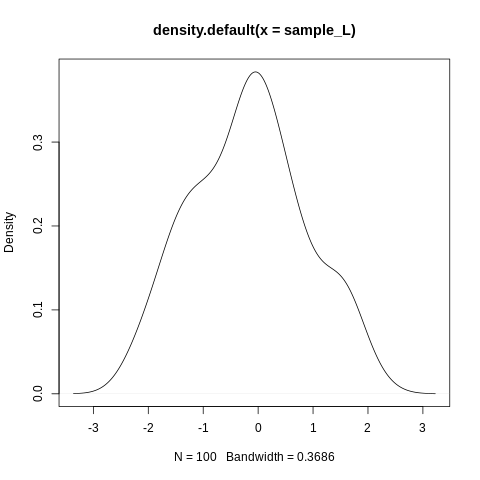

In [ ]:
%%R # Verossimilhança


# Amostra com variância elevada relativo a média

set.seed(2021) # Semente aleatória

sample_L = rnorm(n=100,mean=0,sd=1) # Amostra aleatória simples de uma N(0,1)

plot(density(sample_L)) # Densidade da uma amostra sob normalidade

In [ ]:
%%R

summary(dnorm(x=sample_L,mean=0,sd=1)) # Valores da densidade são < 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03132 0.14392 0.30554 0.27048 0.38267 0.39890 


In [ ]:
%%R

prod(dnorm(x=sample_L,mean=0,sd=1)) # Verossimilhança da amostra

[1] 4.829896e-64


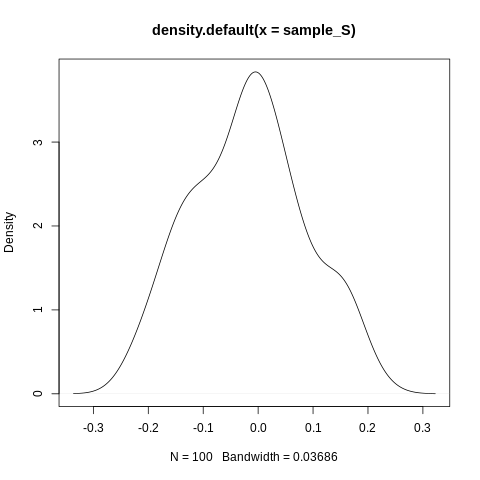

In [ ]:
%%R

# Amostra com variância pequena relativo a média

set.seed(2021) # Semente aleatória

sample_S = rnorm(n=100,mean=0,sd=0.1) # Amostra aleatória simples de uma N(0, 0.1)

plot(density(sample_S)) # Densidade da uma amostra sob normalidade

In [ ]:
%%R

summary(dnorm(x=sample_S,mean=0,sd=0.1)) # Valores da densidade podem ser > 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3132  1.4392  3.0554  2.7048  3.8267  3.9890 


In [ ]:
%%R

prod(dnorm(sample_S,mean=0,sd=0.1)) # Verossimilhança da amostra

[1] 4.829896e+36


In [ ]:
%%R

# Esses dois casos impõem dificuldades computacionais de armazenamentos 
# de valores muito pequenos (quando variância é grande) ou muito grandes
# (quando a variância é pequena) para a Verossimilhança da amostra.
# Vamos aumentar agora o tamanho da amostra
options(digits=22, scipen=999)
set.seed(2021)
for(i in c(10,100,1000,10000)){
  sample_small=rnorm(n=i,mean=0,sd=0.1)
  print(paste("n = ", i, " -> ", prod(dnorm(sample_small,mean=0,sd=0.1)), sep=""))
}
set.seed(2021)
for(i in c(10,100,1000,10000)){
  sample_large=rnorm(n=i,mean=0,sd=1)
  print(paste("n = ", i, " -> ", prod(dnorm(sample_large,mean=0,sd=1)), sep=""))
}

[1] "n = 10 -> 11494.9518651507"
[1] "n = 100 -> 2970700907538456413717750182957809664"
[1] "n = 1000 -> Inf"
[1] "n = 10000 -> Inf"
[1] "n = 10 -> 0.00000114949518651507"
[1] "n = 100 -> 0.000000000000000000000000000000000000000000000000000000000000000297070090753846"
[1] "n = 1000 -> 0"
[1] "n = 10000 -> 0"


In [ ]:
%%R

# Solução: usar o log da verossimilhança
NLL = function(pars, data) {
  # Extrai parâmetros do vetor de dados
  mu = pars[1]
  sigma = pars[2]
  # Calcula o Logaritmo da Verossimilhança (Log-LIkelihood) negativo
  -sum(dnorm(x = data, mean = mu, sd = sigma, log = TRUE))
}

NLL(pars=c(0,1),sample_large)

[1] 14229.53796257172507467


In [ ]:
%%R

NLL(pars=c(0,0.1),sample_small)

[1] -8796.312967368729005102


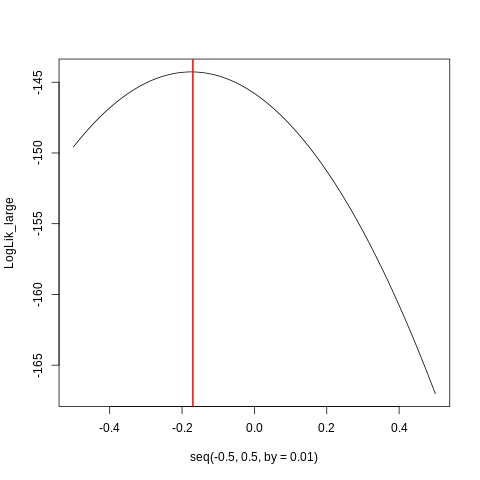

In [ ]:
%%R

# Vantagens do logLik:
# valores da verossimilhança ficam mais próximos de 1
# produtório vira um problema de somatório
# a função atinge seu máximo para os mesmos valores dos parâmetros

# Fixando sigma e variando mu:
LogLik_large=vector(length=101)
for(i in seq(-0.5,0.5,by=0.01)){
  LogLik_large[which(seq(-0.5,0.5,by=0.01) == i)] <- NLL(pars=c(i,1),sample_L)*(-1)
}
plot(x=seq(-0.5,0.5,by=0.01),
     y=LogLik_large,
     type="l")
abline(v=seq(-0.5,0.5,by=0.01)[which.max(LogLik_large)],
       col="red", lwd=2)

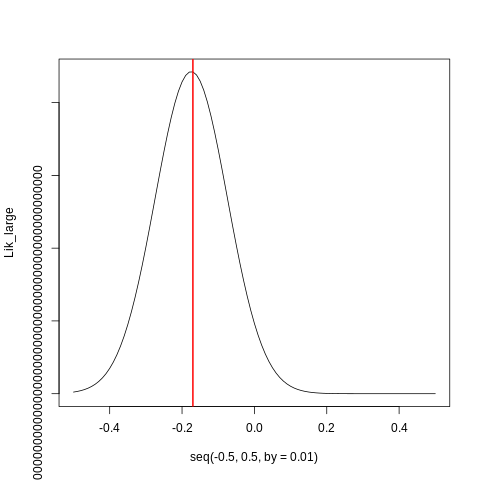

In [ ]:
%%R

LL = function(pars, data) {
  # Extrai parâmetros do vetor de dados
  mu = pars[1]
  sigma = pars[2]
  # Calcula o Logaritmo da Verossimilhança (Log-LIkelihood) negativo
  prod(dnorm(x = data, mean = mu, sd = sigma))
}

Lik_large <- vector(length=101)
for(i in seq(-0.5,0.5,by=0.01)){
  Lik_large[which(seq(-0.5,0.5,by=0.01) == i)] <- LL(pars=c(i,1),sample_L)
}

plot(x=seq(-0.5,0.5,by=0.01),
     y=Lik_large,
     type="l")
abline(v=seq(-0.5,0.5,by=0.01)[which.max(Lik_large)],
       col="red", lwd=2)

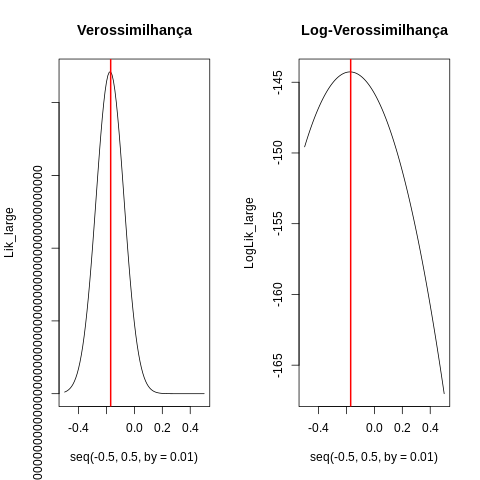

In [ ]:
%%R

par(mfrow=c(1,2))

plot(x=seq(-0.5,0.5,by=0.01),
     y=Lik_large,
     type="l",
     main="Verossimilhança")
abline(v=seq(-0.5,0.5,by=0.01)[which.max(Lik_large)],
       col="red", lwd=2)

plot(x=seq(-0.5,0.5,by=0.01),
     y=LogLik_large,
     type="l",
     main="Log-Verossimilhança")
abline(v=seq(-0.5,0.5,by=0.01)[which.max(LogLik_large)],
       col="red", lwd=2)

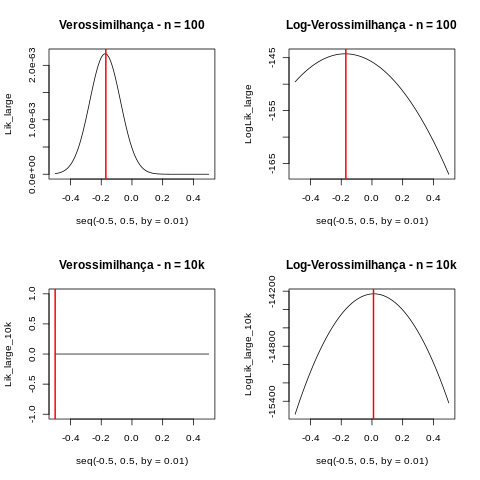

In [ ]:
%%R

# Vamos usar os gráficos agora, so que para amostras maiores
LogLik_large_10k <- vector(length=101)
for(i in seq(-0.5,0.5,by=0.01)){
  LogLik_large_10k[which(seq(-0.5,0.5,by=0.01) == i)] <- NLL(pars=c(i,1),sample_large)*(-1)
}

Lik_large_10k <- vector(length=101)
for(i in seq(-0.5,0.5,by=0.01)){
  Lik_large_10k[which(seq(-0.5,0.5,by=0.01) == i)] <- LL(pars=c(i,1),sample_large)
}

options(scipen = 1)

par(mfrow=c(2,2))

plot(x=seq(-0.5,0.5,by=0.01),
     y=Lik_large,
     type="l",
     main="Verossimilhança - n = 100")
abline(v=seq(-0.5,0.5,by=0.01)[which.max(Lik_large)],
       col="red", lwd=2)
plot(x=seq(-0.5,0.5,by=0.01),
     y=LogLik_large,
     type="l",
     main="Log-Verossimilhança - n = 100")
abline(v=seq(-0.5,0.5,by=0.01)[which.max(LogLik_large)],
       col="red", lwd=2)

plot(x=seq(-0.5,0.5,by=0.01),
     y=Lik_large_10k,
     type="l",
     main="Verossimilhança - n = 10k")
abline(v=seq(-0.5,0.5,by=0.01)[which.max(Lik_large_10k)],
       col="red", lwd=2)
plot(x=seq(-0.5,0.5,by=0.01),
     y=LogLik_large_10k,
     type="l",
     main="Log-Verossimilhança - n = 10k")
abline(v=seq(-0.5,0.5,by=0.01)[which.max(LogLik_large_10k)],
       col="red", lwd=2)

In [ ]:
%%R

# Vamos agora solucionar isso como um exercício de otimização
mle = optim(par = c(mu = 0.2, sigma = 1.5), fn = NLL, data = sample_L,
            control = list(parscale = c(mu = 0.2, sigma = 1.5)))
mle$par

                      mu                    sigma 
-0.174781853810781429015  1.023222826931302176234 


In [ ]:
%%R

# Solucao analítica
c(mu = mean(sample_L), sigma = sd(sample_L))

                      mu                    sigma 
-0.174484404689306510372  1.028625908159627622140 


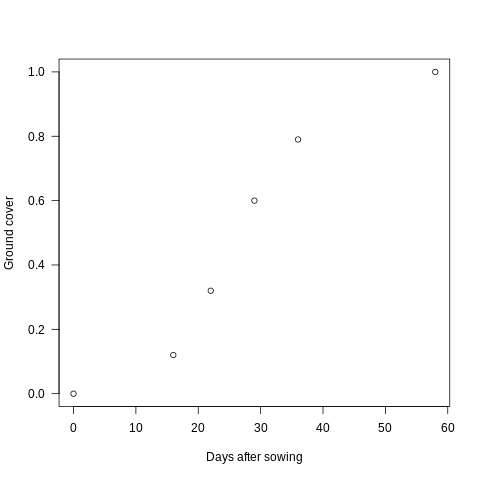

In [ ]:
%%R

# Máxima verossimilhança aplicada a modelos científicos
data = data.frame(t = c(0, 16, 22, 29, 36, 58),
                  G = c(0, 0.12, 0.32, 0.6, 0.79, 1))
plot(data, las = 1, xlab = "Days after sowing", ylab = "Ground cover")

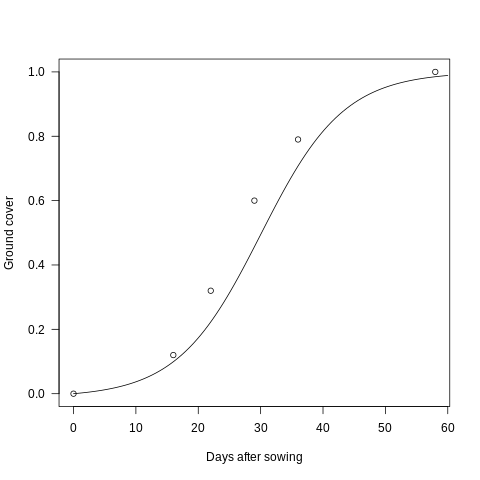

In [ ]:
%%R

G <- function(pars, t) {
  # Extrai parâmetros do modelo
  Gmax = pars[1]
  k = pars[2]
  th = pars[3]
  # Calcula valores preditos pelo modelo
  DG = Gmax/(1 - 1/(1 + exp(k*th)))
  Go = DG/(1 + exp(k*th))
  return(DG/(1 + exp(-k*(t-th)))-Go)
}

plot(data, las = 1, xlab = "Days after sowing", ylab = "Ground cover")
curve(G(c(Gmax = 1, k = 0.15, th = 30), x), 0, 60, add = TRUE)

In [ ]:
%%R

NLL = function(pars, data) {
  # A média agora é descrita pelos valores preditos pelo modelo
  Gpred = G(pars, data$t) 
  # Calcula o Logaritmo da Verossimilhança (Log-LIkelihood) negativo
  return(-sum(dnorm(x = data$G, mean = Gpred, sd = pars[4], log = TRUE)))
}

par0 = c(Gmax = 1.0, k = 0.15, th = 30, sd = 0.01) # definimos valores iniciais para a otimização
fit = optim(par = par0, fn = NLL, data = data, 
            control = list(parscale = abs(par0)),hessian = TRUE)

fit$par


                      Gmax                          k 
 0.99926603094802934901253  0.15879585243724050891423 
                        th                         sd 
26.70700003788776299984420  0.01482375896769921874707 


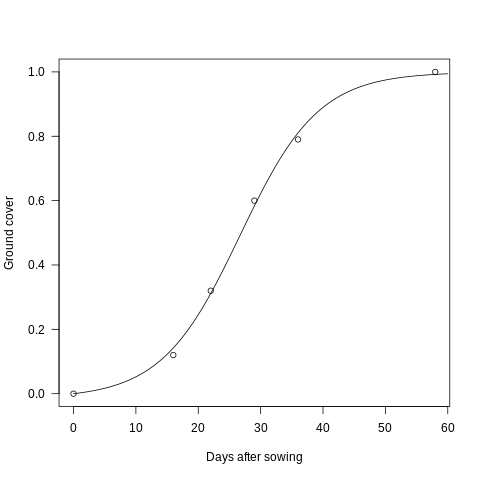

In [ ]:
%%R

plot(data, las = 1, xlab = "Days after sowing", ylab = "Ground cover")
curve(G(fit$par, x), 0, 60, add = TRUE)

# **Referência Complementar: O que é uma função de verossimilhança?**

Portanto, a função de verossimilhança é uma função normalmente usada para resumir os dados. Esta função carrega muitas informações sobre ela, e é por isso que normalmente fazemos a inferência usando-a (ideia de Fisher).

Em resumo, a função de verossimilhança não é uma função de probabilidade e também não mede probabilidades, a função de verossimilhança mede quão realista é θ seja o verdadeiro parâmetro do pfd de X.  

Podemos ter a mesma conclusão se usarmos o logaritmo da função de verossimilhança (função log-verossimilhança). Por esse motivo, procuramos estimativas de probabilidade, pois procuramos o valor mais plausível para esse conjunto de dados.

**A função de verossimilhança é uma função do parâmetro e não dos dados.**

## **Referência**


> [O que é uma função de verossimilhança?](https://scpatricio.github.io/likelihood/)

